# DSE 207R FINAL PROJECT
## Fall 2024
### Author: Vanessa Scott

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

# Why I chose this data?


---
I chose this dataset because it aligns with my research interests and my current occupation. Currently I work in research psychiatry investigating suicide intervention in people with serious mental illnesses(SMIs). I also have an interest in working for San Diego County behavioral health. In searching through San Diego County's behavioral health website, I discovered they have open source data sets that I could play around with. I decided to use the latest uploaded behavioral health dataset for the year 2022 and explore items like leading causes of death and statistics around children and teen suicide attempts from the behavioral health department.


[Data Set Source](https://data.sandiegocounty.gov/Health/2022-Behavioral-Health-Outcomes/45s5-nbh9/about_data)

[Data Dictionary](https://public.tableau.com/app/profile/chsu/viz/2022COREDataGuideandDataDictionary/Home)

The data includes behavioral health outcomes such as hospitalization, death and emergency department discharge. The data also includes condition reported such as mood disorder, suicide(attempt), alcohol use disorder and more. It also includes total counts and rates in terms of per 100,000 people for a range of demographics such as varying ages, genders, ethnicities and races. The data also provides regional information and socioeconomic scores denoted as "ses".
This data set includes data collected from:

* Care Access and Information (HCAI), Emergency Department Discharge Database and
Patient Discharge Database, 2022. SANDAG Population Estimates, 2022 (v11/23). 2022 population estimates were derived from the 2020 decennial census.

Citing AI-- I was unsure of how to import the API using json and overcoming the 1000 row reading limit set by the data provider, so, I consulted copilot for how to utilize iteration for getting past the first 1000 rows using json formatting.

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

base_url = 'https://data.sandiegocounty.gov/resource/45s5-nbh9.json'
params = {
    '$limit': 1000,
    '$offset': 0     # Using offset for pagination
}
all_data = []

while True:
    response = requests.get(base_url, params=params)
    data = response.json()

    if len(data) > 0:
        all_data.extend(data)
    else:
        break
    # Update the offset for pagination
    params['$offset'] += 1000
    if len(all_data) >= 138000:
        break

df = pd.DataFrame(all_data[:138000])

print(df.shape)
df.head(10)

(136800, 15)


,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
0,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Total,Behavioral Health,Total,NaN,NaN
1,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Total_Male,Behavioral Health,Sex,NaN,NaN
2,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Total_Female,Behavioral Health,Sex,NaN,NaN
3,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Hispanic_Total,Behavioral Health,Race/Ethnicity,NaN,NaN
4,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,White_Total,Behavioral Health,Race/Ethnicity,NaN,NaN
5,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Black_Total,Behavioral Health,Race/Ethnicity,NaN,NaN
6,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,API_Total,Behavioral Health,Race/Ethnicity,NaN,NaN
7,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Other_Total,Behavioral Health,Race/Ethnicity,NaN,NaN
8,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Age0_9,Behavioral Health,Age,NaN,NaN
9,Alpine,Death,Alcohol Poisoning,2022,38,ALPINE,EAST,109386,NA,SRA,Age10_19,Behavioral Health,Age,NaN,NaN


### Step 2: Explore the datasets

# Data Exploration and Cleaning
The largest issue to overcome with this data set is that the numeric values that actually hold information for analysis (counts and rates) are reported only in specific rows. Due to this, for cleaning, I had to do a lot of data filtering for the data frames to make sure only numeric rows and totals were included. Additionally, many of the columns contain "NA" values, so I had to drop a lot of NA values or NaN values for analyzing. There was also so much data, that in certain visualizations, I realized I needed to narrow down what I wanted to see, for example, the geotype variable has more than regions included in it an showed more information than I wanted, so I needed to specify further.

In [ ]:
df.describe()

,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
count,136800,136800,136800,136800,136800,136800,136800,136800,136800,136800,136800,136800,136800,20410,14918
unique,72,4,19,1,47,59,7,42,1,5,25,1,7,9910,14753
top,Alpine,Death,Alcohol Poisoning,2022,3,SAN MARCOS,NA,NA,NA,SRA,Total,Behavioral Health,Age,12,2.851079223
freq,1900,34200,7200,136800,7600,3800,47500,58900,136800,77900,5472,136800,49248,167,4


In [ ]:
#checking for the data type in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136800 entries, 0 to 136799
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   geography       136800 non-null  object
 1   outcome         136800 non-null  object
 2   condition       136800 non-null  object
 3   year            136800 non-null  object
 4   geoid           136800 non-null  object
 5   geoname         136800 non-null  object
 6   region          136800 non-null  object
 7   ses             136800 non-null  object
 8   district        136800 non-null  object
 9   geotype         136800 non-null  object
 10  index           136800 non-null  object
 11  conditiongroup  136800 non-null  object
 12  indexgroup      136800 non-null  object
 13  counts          20410 non-null   object
 14  rates           14918 non-null   object
dtypes: object(15)
memory usage: 15.7+ MB


In [ ]:
#checking for the potential outcomes in the dataset
outcome = df['outcome']
outcome.value_counts()

,count
outcome,
Death,34200
ED Discharge,34200
Hospitalization,34200
In-Patient Treatment,34200


In [ ]:
#checking for how many San Diego Counties included in the report
geo_count = df['geography'].value_counts()
geo_count

,count
geography,
Alpine,1900
Anza-Borrego Springs,1900
Poway,1900
Peninsula,1900
Pendleton,1900
...,...
City of Vista,1900
City of Solana Beach,1900
City of Santee,1900


In [ ]:
#looking at the demographic categories in the set
demo = df['index']
print(demo.value_counts())

index
Total                    5472
Age50_59                 5472
AA_API_TotalRate         5472
AA_Black_TotalRate       5472
AA_White_TotalRate       5472
AA_Hispanic_TotalRate    5472
AA_TotalFemaleRate       5472
AA_TotalMaleRate         5472
AARate                   5472
Age80plus                5472
Age70_79                 5472
Age60_69                 5472
Age40_49                 5472
Total_Male               5472
Age30_39                 5472
Age20_29                 5472
Age10_19                 5472
Age0_9                   5472
Other_Total              5472
API_Total                5472
Black_Total              5472
White_Total              5472
Hispanic_Total           5472
Total_Female             5472
AA_Other_TotalRate       5472
Name: count, dtype: int64


At this point in exploration, with very little variation in counts, I realize that the true values are summarized in the counts and rates column for each county. In order to make use of these values, I had to find a way to get rid of any columns that had NaN and make sure these columns were numeric for analysis. So for filtering my data frame, I make sure the "counts" and "rates" have numeric values. throughout my visualization process.

# Step 3:  Identify 3 research questions and perform analysis
# My Research Questions:


---



1.   What is the leading cause of death in terms of behavioral health in San Diego County in the year 2022 and what region of San Diego had the highest death rate in 2022?

2.   What is the rate of reported suicide attempts in children and teens aged 0-19 in San Diego in the year 2022 and what are the outcomes regarding those attempts?

3. What is the relationship between socioeconomic status and death rates in San Diego County in 2022? Specifically, is socioeconmic status related to rates of reported death from all behavioral health conditions and can socioeconmic levels be grouped by median subregional gross income for death rates? Secondarily, does socioeconmic status also relate to reported suicide attempts in children aged 0-19?





# Question 1

---
What is the leading cause of death in terms of behavioral health in San Diego County in the year 2022 and what region of San Diego had the highest death rate in 2022?



In [ ]:
#filtered the dataframe to restrict certain variables to numeric only and drop null values, also filter to see only the death outcome

df['counts'] = pd.to_numeric(df['counts'], errors='coerce')
df['rates'] = pd.to_numeric(df['rates'], errors='coerce')
death_df = df[(df['counts'].notna()) & (df['rates'].notna()) & (df['ses'].notna()) & (df['indexgroup'] == 'Total') & (df['outcome'] == 'Death')]
death_df.head()

,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
2720,Carlsbad,Death,All Drug Overdoses,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Total,Behavioral Health,Total,24.251398,19.782848
3944,Central Region,Death,Alcohol Related Disorders,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,99.000000,20.506235
4012,Central Region,Death,All Drug Overdoses,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,205.000000,42.462405
4080,Central Region,Death,All Opioid Overdoses,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,152.000000,31.484320
5032,Central Region,Death,Suicide,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,55.000000,11.392353


In [ ]:
#checking to see counts of records for death by what condition
death_df['condition'].value_counts()

,count
condition,
All Drug Overdoses,38
Alcohol Related Disorders,31
All Opioid Overdoses,31
Suicide,19
Alcohol Poisoning,1
Substance Use/Abuse/Dependency,1


Text(0.5, 1.0, 'San Diego 2022 Death Rates by Region')

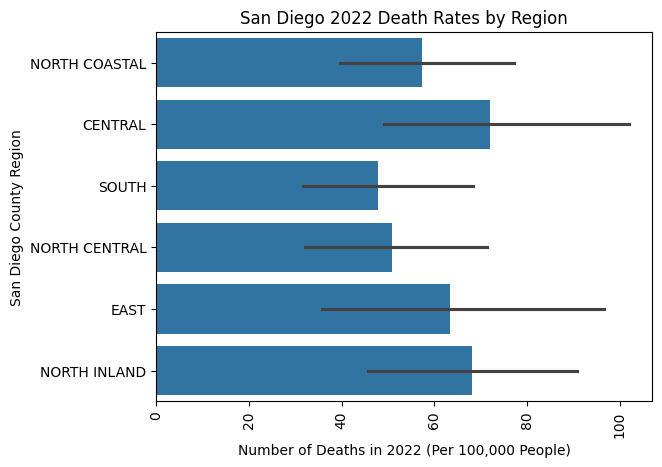

In [ ]:
#visualizing the death rates by region for san diego to see where most death occured in 2022
sns.barplot(x='counts', y='region', data=death_df[(death_df['counts'].notna()) & (death_df['region'] != 'NA')])
plt.xticks(rotation=90)
plt.ylabel('San Diego County Region')
plt.xlabel('Number of Deaths in 2022 (Per 100,000 People)')
plt.title('San Diego 2022 Death Rates by Region')

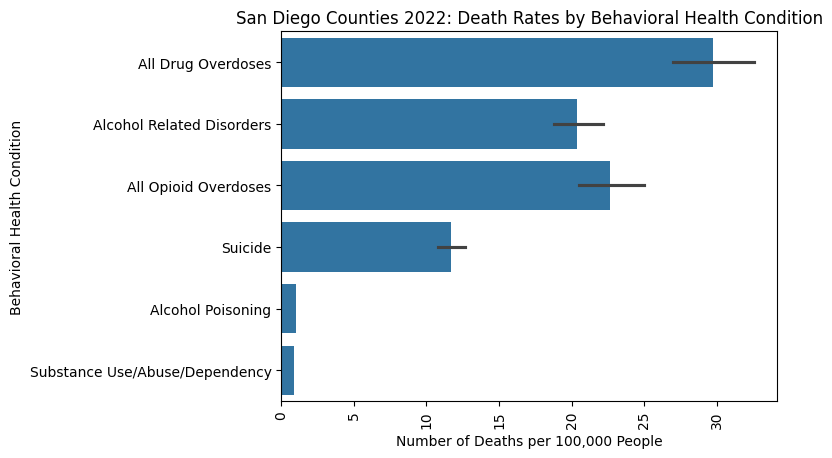

In [ ]:
#checking the rates of death by condition and finding that all drug overdoses have the highest rate of cause of death
sns.barplot(x = death_df['rates'], y = death_df['condition'])
plt.xticks(rotation=90)
plt.xlabel('Number of Deaths per 100,000 People')
plt.ylabel('Behavioral Health Condition')
plt.title('San Diego Counties 2022: Death Rates by Behavioral Health Condition')
plt.show()

In [ ]:
#creating a data frame with all drug overdoses
od_deaths = death_df[(death_df['condition']== 'All Drug Overdoses') & (death_df['geotype'] == 'Region')]
od_deaths

,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
4012,Central Region,Death,All Drug Overdoses,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,205.0,42.462405
35020,East Region,Death,All Drug Overdoses,2022,5,EAST,EAST,NA,NA,Region,Total,Behavioral Health,Total,185.0,37.674218
55692,North Central Region,Death,All Drug Overdoses,2022,2,NORTH CENTRAL,NORTH CENTRAL,NA,NA,Region,Total,Behavioral Health,Total,138.0,21.091275
56984,North Coastal Region,Death,All Drug Overdoses,2022,1,NORTH COASTAL,NORTH COASTAL,NA,NA,Region,Total,Behavioral Health,Total,133.0,24.343548
58276,North Inland Region,Death,All Drug Overdoses,2022,6,NORTH INLAND,NORTH INLAND,NA,NA,Region,Total,Behavioral Health,Total,118.0,19.568595
76364,South Region,Death,All Drug Overdoses,2022,4,SOUTH,SOUTH,NA,NA,Region,Total,Behavioral Health,Total,128.0,25.106802


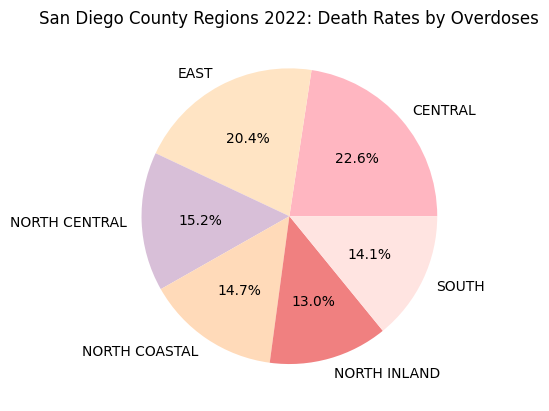

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#creating a pie chart to visualize what proportions of san diego regions have most death by drug overdoses
plt.pie(od_deaths['counts'], labels=od_deaths['region'], autopct='%1.1f%%', colors= ['lightpink','bisque','thistle','peachpuff','lightcoral','mistyrose'])
plt.title('San Diego County Regions 2022: Death Rates by Overdoses')
plt.show()
plt

# Question 2


---
What is the rate of reported suicide attempts in children and teens aged 0-19 in San Diego in the year 2022 and what are the outcomes regarding those attempts?



In [ ]:
#creating a dataframe to look only at the demographic including kids 0-19
children = df[((df['index'] == 'Age0_9') | (df['index'] == 'Age10_19'))  & (df['counts'].notna()) & (df['rates'].notna())]
children.head()

,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
1182,Alpine,ED Discharge,Suicide,2022,38,ALPINE,EAST,109386,NA,SRA,Age10_19,Behavioral Health,Age,23.712273,1118.510408
2678,Carlsbad,ED Discharge,Alcohol Related Disorders,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Age10_19,Behavioral Health,Age,24.659891,143.879378
2746,Carlsbad,ED Discharge,All Drug Overdoses,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Age10_19,Behavioral Health,Age,36.596466,213.523926
3052,Carlsbad,In-Patient Treatment,Depression,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Age10_19,Behavioral Health,Age,32.935712,192.165074
3256,Carlsbad,In-Patient Treatment,Mood Disorders,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Age10_19,Behavioral Health,Age,50.760549,296.164983


In [ ]:
#looking at the outcomes for children aged 0-19, curious to find no deaths reported
children_outcomes = children['outcome'].value_counts()
print(children_outcomes)

outcome
ED Discharge            282
In-Patient Treatment    141
Hospitalization          35
Name: count, dtype: int64


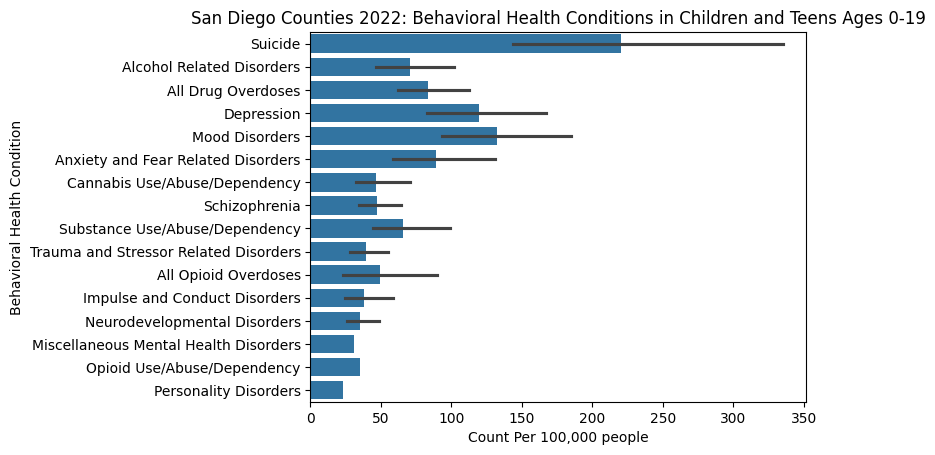

In [ ]:
#looking at counts of reported conditions in children aged 0-19
sns.barplot(y=children['condition'], x=children['counts'])
plt.xlabel('Count Per 100,000 people')
plt.ylabel('Behavioral Health Condition')
plt.title('San Diego Counties 2022: Behavioral Health Conditions in Children and Teens Ages 0-19')
plt.show()

In [ ]:
#creating a dataframe that has children aged 0-19 and have condition listed as "suicide"
si_child = children[children['condition'] == 'Suicide']
si_child

,geography,outcome,condition,year,geoid,geoname,region,ses,district,geotype,index,conditiongroup,indexgroup,counts,rates
1182,Alpine,ED Discharge,Suicide,2022,38,ALPINE,EAST,109386,NA,SRA,Age10_19,Behavioral Health,Age,23.712273,1118.510408
3766,Carlsbad,ED Discharge,Suicide,2022,41,CARLSBAD,NORTH COASTAL,123660,NA,SRA,Age10_19,Behavioral Health,Age,124.715622,727.659591
5058,Central Region,ED Discharge,Suicide,2022,3,CENTRAL,CENTRAL,NA,NA,Region,Age10_19,Behavioral Health,Age,383.000000,688.526948
6350,Central San Diego,ED Discharge,Suicide,2022,1,CENTRAL SAN DIEGO,CENTRAL,79440,NA,SRA,Age10_19,Behavioral Health,Age,102.910530,822.846464
7642,Chula Vista,ED Discharge,Suicide,2022,21,CHULA VISTA,SOUTH,61537,NA,SRA,Age10_19,Behavioral Health,Age,141.319573,894.948289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89038,Unincorporated,ED Discharge,Suicide,2022,19,UNINCORPORATED,NA,NA,NA,Municipal,Age10_19,Behavioral Health,Age,553.905259,822.732731
89055,Unincorporated,Hospitalization,Suicide,2022,19,UNINCORPORATED,NA,NA,NA,Municipal,Age10_19,Behavioral Health,Age,25.208169,37.442479
90330,University,ED Discharge,Suicide,2022,12,UNIVERSITY,NORTH CENTRAL,95111,NA,SRA,Age10_19,Behavioral Health,Age,31.790425,258.273026
91622,Valley Center,ED Discharge,Suicide,2022,53,VALLEY CENTER,NORTH INLAND,112474,NA,SRA,Age10_19,Behavioral Health,Age,31.408038,1006.327426


Text(0.5, 1.0, 'San Diego County 2022: Reported Suicide Attempt in Children and Teens Ages 0-19')

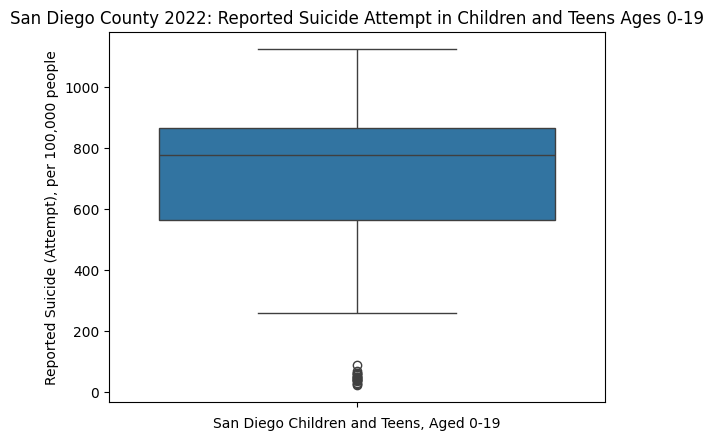

In [ ]:
#looking for outliers in rates of suicide in kids aged 0-19
sns.boxplot(si_child['rates'])
plt.xlabel('San Diego Children and Teens, Aged 0-19')
plt.ylabel('Reported Suicide (Attempt), per 100,000 people')
plt.title('San Diego County 2022: Reported Suicide Attempt in Children and Teens Ages 0-19')

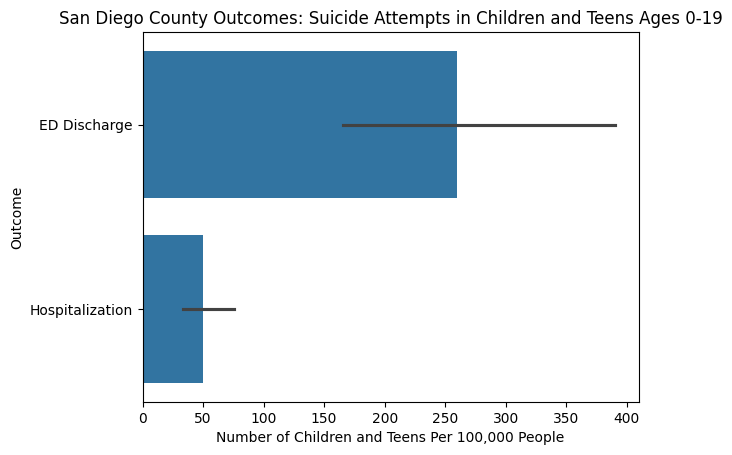

In [ ]:
#Checking frequency of outcomes with children who have "suicide" listed as their condition
si_child = children[children['condition'] == 'Suicide']
si_child
sns.barplot(y = si_child['outcome'], x = si_child['counts'])
plt.xlabel('Number of Children and Teens Per 100,000 People')
plt.ylabel('Outcome')
plt.title('San Diego County Outcomes: Suicide Attempts in Children and Teens Ages 0-19')
plt.show()

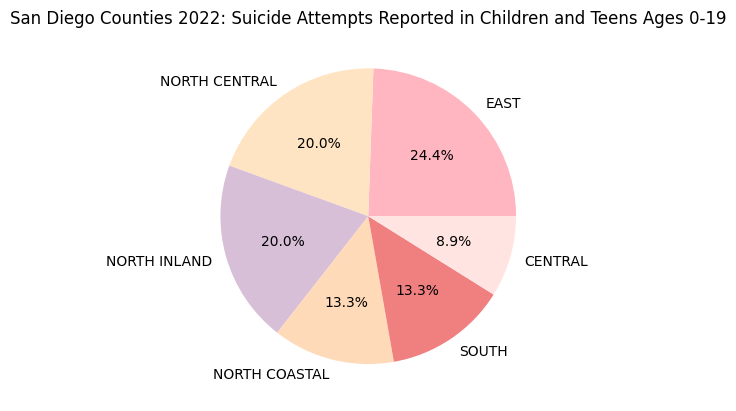

In [ ]:
#checking the distribution across regions of San Diego for children(0-19) that attempted suicide
filtered_si_child = si_child[si_child['region'] != 'NA']

plt.pie(filtered_si_child['region'].value_counts(),
        labels=filtered_si_child['region'].value_counts().index, autopct='%1.1f%%', colors= ['lightpink','bisque','thistle','peachpuff','lightcoral','mistyrose'])
plt.title('San Diego Counties 2022: Suicide Attempts Reported in Children and Teens Ages 0-19')
plt.show()

# Question 3


---
What is the relationship between socioeconomic status and death rates in San Diego County in 2022? Specifically, is socioeconmic status related to rates of reported death from all behavioral health conditions and can socioeconmic levels be grouped by median subregional gross income for death rates? Secondarily, does socioeconmic status also relate to reported suicide attempts in children aged 0-19?



Text(0.5, 1.0, 'SD County 2022: Death Rates Related to Socioeconmoic Status')

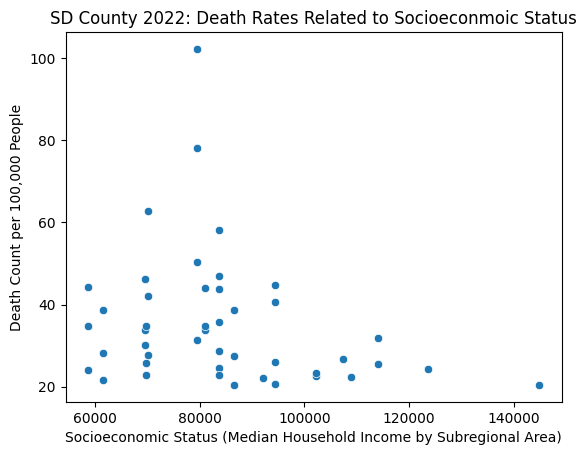

In [ ]:
#looking at the relationship of socioeconmic scores and death rates without cluster points.
dead_ses['ses'] = pd.to_numeric(dead_ses['ses'], errors='coerce')
sns.scatterplot(y = dead_ses['counts'], x = dead_ses['ses'])
plt.xlabel('Socioeconomic Status (Median Household Income by Subregional Area)')
plt.ylabel('Death Count per 100,000 People')
plt.title('SD County 2022: Death Rates Related to Socioeconmoic Status')

In [ ]:
#prepping for kmeans cluster analysis
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [ ]:
#narrowing dataframe to include data that is numeric
dead_ses['ses'] = pd.to_numeric(dead_ses['ses'], errors='coerce')
dead_ses = death_df[(death_df['ses'].notna()) & death_df['ses'] != 'NA'][['ses','counts','rates']]

dead_ses.head()
#dead_ses.shape

,ses,counts,rates
2720,123660,24.251398,19.782848
3944,NA,99.000000,20.506235
4012,NA,205.000000,42.462405
4080,NA,152.000000,31.484320
5032,NA,55.000000,11.392353


In [ ]:
#deciding on four clusters because the silohette score stabalizes at 4 by getting closer to 1.
dead_ses = dead_ses.dropna()
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(dead_ses[['ses','counts','rates']])

KMeans(n_clusters=4)

In [ ]:
y_kmeans = kmeans.fit_predict(dead_ses)
y_kmeans

array([2, 3, 3, 3, 3, 0, 0, 0, 1, 2, 0, 0, 0, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 0, 0, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 3, 3,
       3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[6.59048000e+04, 3.44840335e+01, 2.47662354e+01],
       [1.02676100e+05, 2.84027103e+01, 2.40136714e+01],
       [1.34262000e+05, 2.23489451e+01, 1.58807885e+01],
       [8.32433889e+04, 4.13480168e+01, 2.96585195e+01]])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(dead_ses, labels=y_kmeans)

0.63055428298365

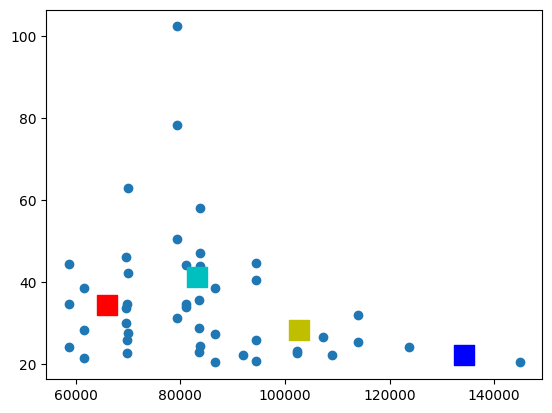

In [ ]:
#noting that 4 looks visually off because there are no distinct data points around cyan point.
#Assessing if there are distinct socioeconomic groups associated with the rates of death
plt.scatter(data=dead_ses, x='ses', y='counts')
colors = ['r', 'y', 'b', 'c', 'g', 'm', 'k', 'orange', 'purple']
for i, coor in enumerate(kmeans.cluster_centers_):
  plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.show()

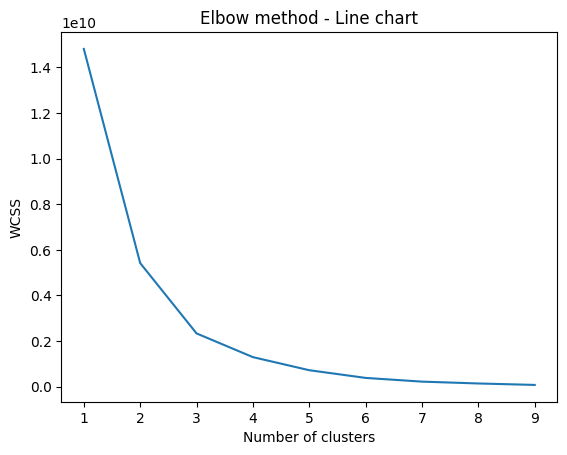

In [ ]:
#trying elbow method to verify number of clusters. 4 is a resonable point to try since the data seems to complete stabilization around that point
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dead_ses)
    wcss.append(kmeans.inertia_)

#Run this cell
plt.plot(range(1, 10), wcss)
plt.title('Elbow method - Line chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<ipython-input-222-d13e7fc0ab9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_ses['ses'] = pd.to_numeric(children_ses['ses'], errors='coerce')


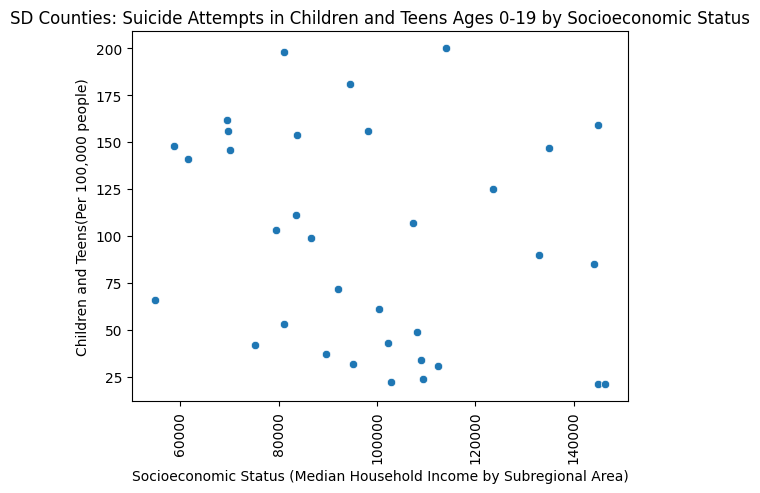

In [ ]:
#checking if socioecominc status is related to childrens attempted suicide rates in 2022 as well, no clearly observed relationship
children_ses = df[((df['index'] == 'Age0_9') | (df['index'] == 'Age10_19')) & (df['ses'].notna()) & (df['ses'] != 'NA') & (df['condition'] == 'Suicide') & (df['counts'].notna()) & (df['rates'].notna())]
children_ses['ses'] = pd.to_numeric(children_ses['ses'], errors='coerce')
children_ses = children_ses.dropna(subset=['ses'])
children_ses = children_ses.sort_values(by='ses', ascending=True)
sns.scatterplot(x= children_ses['ses'], y = round(children_ses['counts']))

plt.xticks(rotation=90)
plt.xlabel('Socioeconomic Status (Median Household Income by Subregional Area)')
plt.ylabel('Children and Teens(Per 100,000 people)')
plt.title('SD Counties: Suicide Attempts in Children and Teens Ages 0-19 by Socioeconomic Status')
plt.show()

# Step 4:  Present your findings


# Research Question Insights:


---



##1.   What is the leading cause of death in terms of behavioral health in San Diego County in the year 2022 and what region of San Diego had the highest death rate in 2022?

*   For this question, the first thing I wanted to see was which region had the highest level of death disregarding cause in general. For this, I created a barplot with the rates of death by region and found that Central San Diego had the highest death rate in San Diego in 2022. I think this makes sense intuitivley, in that we can assume the largest populous of people would reside in the central region of an urban city.

* The second thing I investigated was the highest reported condtion for records that resulted in death. This graphic indicated drug overdoses over other conditions led to death the most.

* Then, I created a dataframe with deaths due to overdoses and visualized the proportions of death by overdose by region. At this juncture, we can see that the Central and East regions of San Diego accounted for almost half of the overdose related deaths in 2022 based on this dataset.



##2.   What is the rate of reported suicide attempts in children and teens aged 0-19 in San Diego in the year 2022 and what are the outcomes regarding those attempts?

* First I investigated the rates of various conditions reported for those aged 0-19 and found suicide was reported the most. Second to suicide, mood disorders and Depression were also reported with higher rates.

* Then, I wanted to see only children aged 0-19 who had suicide listed as their condtion. I also visualized a boxplot with the rates of suicide attempts for kids aged 0-19 to identify any outliers and see the statistical spread of the sample. The data indicated that the median reported rate of suicide reported for ages 0-19 is around 780 people per 100,000 persons.

* Lastly, I wanted to see the outcomes for kids listed ages 0-19 when suicide was their reported condition. Suprisingly, death is not reported for any children 0-19 in the 2022 report. The primary outcome was emergency department discharge.

* This raised some alarms for me with the validity of the dataset. In that I would expect some death to be an outcome of those who had attempted suicide. Although, if the data is accurate, this is, of course, good news.

##3. What is the relationship between socioeconomic status and death rates in San Diego County in 2022? Specifically, is socioeconmic status related to rates of reported death from all behavioral health conditions and can socioeconmic levels be grouped by median subregional gross income for death rates? Secondarily, does socioeconmic status also relate to reported suicide attempts in children aged 0-19?

* Primarily for this question, I began with seeing if there are distinct groups for socioeconimic status when it came to rates of death in San Diego by using a kmeans method. When choosing cluster centers, my silohette score stabilized at 4 and the elbow method indicated that 4 was also fine to use. Visually, it is a little concerning because the last point appears to have no visually close data points. However, it also does not look right with only 3 points. My logic is that there are 4 distinct groups when related to death rates by socioeconmic status: group 1 can be defined as those under 70k, group 2 those right over 80k, those around 110k and lastly those over 140k.

* I think it is important to note that the clusters with the highest death rates are in the groups with the lowest median income reported between about 60k and 80k. For most of America, this number might seem high, but in San Diego county, as most of us know, if fairly low income. With a quick google search, to be considered low income in San Diego is a houshold making 84k and under. This begs larger questions...what factors are contributing to low income families with behavioral health conditions having higher morbidity rates in San Diego?

* Lastly, as a follow-up on socioeconmic status and investigating the high rates of reported attempted suicide in children and teens (0-19), I wanted to know if we also saw this relationship of lower income being related to higher suicide rates in children. Interestingly, I did not find that there was a clear relationship between the two. My guess, is that children and teens attempting suicide is possibly less driven by socioeconimc status and motivated by other factors such as fragility in development and overall mental distress regradless of financial factors.





#Limitations and Conclusions

* To address limitations with this dataset, there was a double-edge sword with the amount of data contributed to the set. With this, I mean that while there was a large amount of data reported, only some of it was analyzable given that most of the data fields were categorical rather than numeric. With more time, I think I could have bypassed some of this, but the data really only provided some surface level insights with it's counts and rates column. Additionally, the data was sourced from various organizations, and I cannot be sure that the harmonization of this data was done with equality across the organizations. Meaning, since it was collected in many places and possibly many ways, I cannot say the counts and rates are fully accurate representations accross all counties and demographics.

* To conculde, working with this dataset opens the doors to many future questions about the directions of San Diego behavioral healthcare and identifies possible targets for improvement. By looking at regional data, this kind of analysis could help inform what areas of San Diego need behavioral healthcare improvements and what programming might need more support (drug use vs alcohol use etc).

* I think this set was a fun personal endevor to work with since it aligns with my interests and is representative of the kind of data I might work with in my future career. This is the largest set of data I have worked with to date. I would day, I think there are perks to working with smaller datasets that have more variables of measurements. I found it difficult working with a robust dataset that was primarly categorical for performing things like prediction models etc..

# 2. Video

[Final Video](https://drive.google.com/file/d/1az4YHZqcWQlsDDf1BI5-1SKpLthwBCPc/view?usp=sharing)